<hr>
<b><font color='red'>Ejercicio 01</font></b> 

El método **Montecarlo** es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser “la capital del juego de azar”, al ser la ruleta un generador simple de números aleatorios. El nombre y el desarrollo sistemático de los métodos de Montecarlo datan aproximadamente de 1944 testee combinaciones posibles.

Vamos a calcular el valor de $\pi$, para ello, si $X$ e $Y$ son dos variables aleatorias continuas uniformes en el intervalo (-1,1) y son independientes.  
$\pi$ Vendrá dada por la probabilidad de que $X^2 + Y^2  \leq 1$, es decir:  
$$\pi = \frac{4*\text{nº puntos que caén dentro}}{\text{nº total de intentos}}$$ 
Obten tambien una gráfica como la que se muestra a continuación.

pi = 3.1468


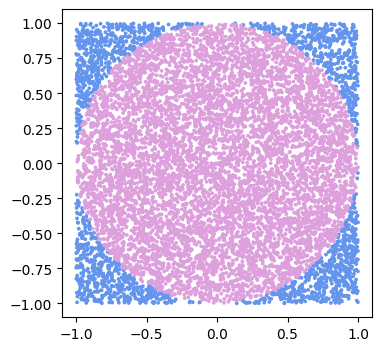

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

N=10000
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
z = []
n_in=0

for i in range(len(x)):
    if (x[i]**2+y[i]**2)<=1:
        z.append("plum")
        n_in=n_in+1
    else:
        z.append("cornflowerblue")
        
print("pi =",n_in*4/N)      
plt.figure(figsize=(4,4))
plt.scatter(x, y, c=z,s=3)
plt.show()

<img src="f6.png">  

<hr>
<b><font color='red'>Ejercicio 02</font></b> 

Crea un histograma en que se vea la distribución que saldría al sumar dos dados, tiene que verse una gráfica como la que se muestra a continuación

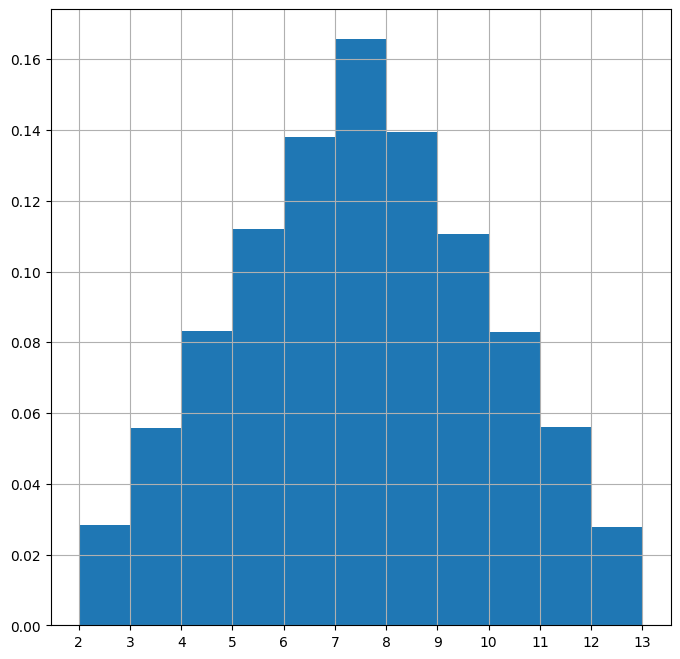

In [9]:
N=100000
bins=[2,3,4,5,6,7,8,9,10,11,12,13]
dado1=np.random.randint(1,7, size=N)
dado2=np.random.randint(1,7, size=N)
suma=dado1+dado2
plt.figure(figsize=(8,8))
plt.hist(suma, bins,density=True)
plt.xticks(bins)
plt.grid(True)
plt.show()

<img src="f7.png">  

<hr>
<b><font color='red'>Ejercicio 03</font></b> 

Al implementar MD5, obtendremos como resultado, una cadena alfanumérica de 32 caracteres hexadecimales. Ocupando siempre 16 Bytes de memoria. 

El siguiente pin = '4aca32b706287f13903f08b7aab38f79', ha sido codificado con md5 "hashlib.md5(b'****')", para ello han utilizado dos carácteres en mayúsculas ('ABCDEF')  y dos números (0-9) , haz una función que obtenga el pin descodificado utilizando random.

¿Cuántos intentos ha relizado hasta que la ha descubierto?
Realiza el ejercicio varias veces y haz un histograma.



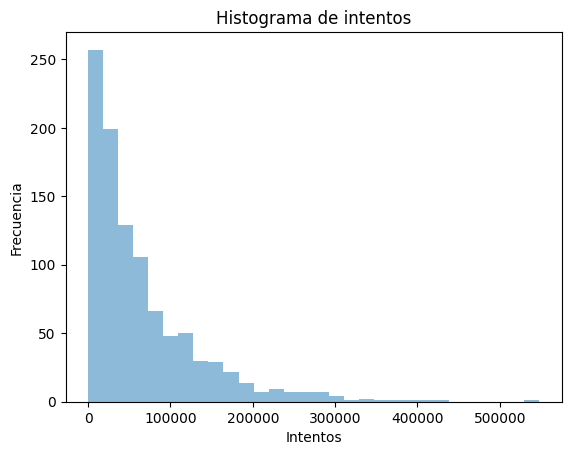

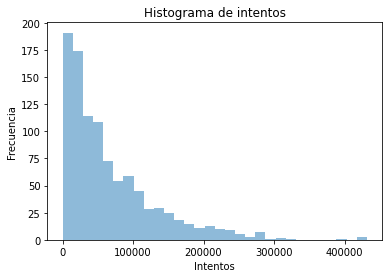

In [10]:
import hashlib
import string

letras= 'ABCDEF'

def descodificar_pin(hash_md5):
    intentos = 0
    while True:
        pin = ''.join(random.choices(letras + string.digits, k=4))
        intentos += 1
        pin_hash = hashlib.md5(pin.encode()).hexdigest()
        if pin_hash == hash_md5:
            #print(f'Se ha adivinado el pin {pin} con {intentos} intentos.')
           return pin, intentos

intentos_lista = []

num_ejecuciones = 1000

for _ in range(num_ejecuciones):
    hash_md5 = '4aca32b706287f13903f08b7aab38f79'
    _, intentos = descodificar_pin(hash_md5)
    intentos_lista.append(intentos)

plt.hist(intentos_lista, bins=30, alpha=0.5)
plt.title('Histograma de intentos')
plt.xlabel('Intentos')
plt.ylabel('Frecuencia')
plt.show()

<hr>
<b><font color='red'>Ejercicio 04</font></b>  

<img src="ruleta.png"> 

La ruleta europea tiene 37 números, de los cuales 18 son rojos, 18 negros y el 0, que es verde, entre las diversas apuestas existe la de de apostar todo a rojos o negros, en este caso si se gana, se ganaría lo mismo que se ha apostado.

Haz la siguiente simulación, empezando con una cantidad de 1000 euros, apostando de forma constante 50 Euros, haz que la maquina apueste siempre a los pares o a los impares, en ambos casos si sale 0 se perderia lo apostado.


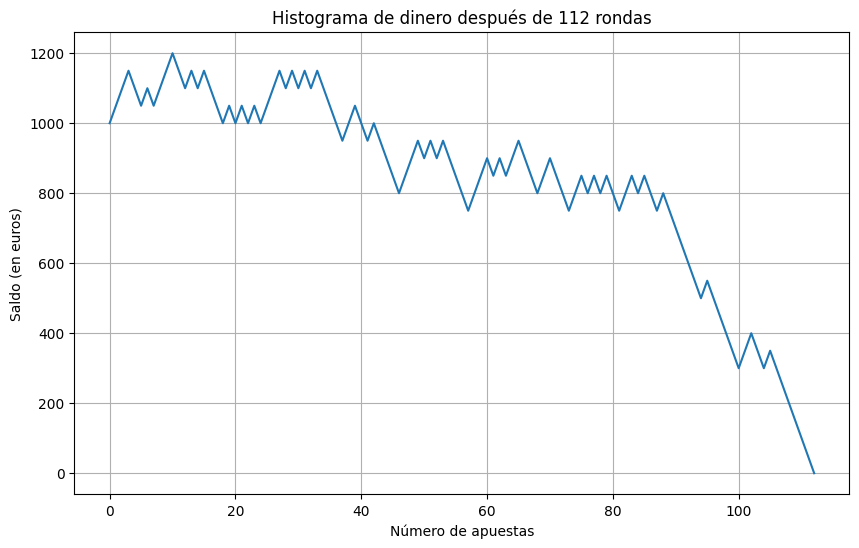

In [11]:
import random
import matplotlib.pyplot as plt

def ruleta():
    return random.randint(0, 36)

def apuesta_par():
    numero = ruleta()
    return numero % 2 == 0 and numero != 0

def simulacion():
    dinero = 1000
    apuesta = 50
    rondas = 0
    historial_dinero = [dinero]

    while dinero > 0:
        rondas += 1
        if apuesta_par():
            dinero += apuesta
        else:
            dinero -= apuesta
        historial_dinero.append(dinero)

    return historial_dinero, rondas

historial_dinero, rondas = simulacion()

plt.figure(figsize=(10,6))
plt.plot(historial_dinero)
plt.title(f"Histograma de dinero después de {rondas} rondas")
plt.xlabel('Número de apuestas')
plt.ylabel('Saldo (en euros)')
plt.grid(True)
plt.show()

<hr>
<b><font color='red'>Ejercicio 05</font></b>  

Utiliza 10 jugadores y haz el promedio de veces en lo que tardarían en arruinarse

In [12]:
import random
import matplotlib.pyplot as plt
import numpy as np

def ruleta():
    return random.randint(0, 36)

def apuesta_par():
    numero = ruleta()
    return numero % 2 == 0 and numero != 0

def simulacion():
    dinero = 1000
    apuesta = 50
    rondas = 0
    historial_dinero = [dinero]

    while dinero > 0:
        rondas += 1
        if apuesta_par():
            dinero += apuesta
        else:
            dinero -= apuesta
        historial_dinero.append(dinero)

    return rondas

# Simulamos el juego para 10 jugadores
rondas = [simulacion() for _ in range(10)]

# Calculamos el promedio de rondas hasta la ruina
promedio_rondas = np.mean(rondas)

print(f"En promedio, los jugadores se arruinaron después de {promedio_rondas} rondas.")


En promedio, los jugadores se arruinaron después de 437.2 rondas.


<hr>
<b><font color='red'>Ejercicio 06</font></b>  

Obten la siguiente evolución respecto el número de jugadores:

    print("%6d" % njugadores,"%.1f" % a.mean(),"%.0f"%a.std())
        10 636.8 624
        20 603.0 799
        50 799.2 875
       100 558.1 500
       200 921.6 1236
       500 744.2 936
      1000 726.1 1021
      5000 734.3 967
     10000 734.5 1021


In [13]:
import random
import numpy as np

def ruleta():
    return random.randint(0, 36)

def apuesta_par():
    numero = ruleta()
    return numero % 2 == 0 and numero != 0

def simulacion():
    dinero = 1000
    apuesta = 50
    rondas = 0

    while dinero > 0:
        rondas += 1
        if apuesta_par():
            dinero += apuesta
        else:
            dinero -= apuesta

    return rondas

njugadores_lista = [10, 20, 50, 100, 200, 500, 1000, 5000, 10000]

for njugadores in njugadores_lista:
    rondas = [simulacion() for _ in range(njugadores)]
    print("%6d" % njugadores,"%.1f" % np.mean(rondas),"%.0f"%np.std(rondas))

    10 749.2 782
    20 759.8 703
    50 435.8 415
   100 695.0 970
   200 708.9 914
   500 786.4 1083
  1000 747.7 1012
  5000 747.4 1083
 10000 731.9 1010


<hr>
<b><font color='red'>Ejercicio 07</font></b>  

Empezamos con el problema del viajante, (Travelling Salesman Problem) responde a la siguiente pregunta: dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen? Este es un problema NP-Hard dentro en la optimización combinatoria, muy importante en investigación operativa y en ciencias de la computación. 
En el siguiente problema partiendo de Madrid tenemos que pasar por las siguientes ciudades

In [46]:
from ipyleaflet import Map, Polyline
from ipyleaflet import Map, basemaps, basemap_to_tiles, Circle


ciudad = [[40.4950873744,-3.71704619215],
[41.6207742504,-2.58874304739],
[38.4786378049,-0.568699068376],
[42.0439686698,1.04798206104],
[36.5538729195,-5.7604183752],
[40.8049892162,-6.06541224773],
[42.435764706,-8.46106294738],
[38.0165122783,-3.44169215171],
[41.6203648019,-1.06449678144],
[42.1280117119,2.6735559327],
[43.292357861,-5.99350932547]]
 
line = Polyline(
    locations=ciudad,
    color="blue" ,
    weight = 2,
    fill=False
)
c=ciudad[0]
m = Map(center = ciudad[0], zoom =5.4)
for i in ciudad:
    circle = Circle()
    circle.location = i
    circle.radius = 5000
    circle.color = "blue"
    circle.fill_color = "blue"
    m.add_layer(circle)
m.add_layer(line)
m

Map(center=[40.4950873744, -3.71704619215], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

Crea una función que obtenga el recorrido realizado, testeala con el orden actual de ciudades 

    sol : d = 435.6697061255633

In [47]:
def calcular_d(recorrido):
    d=0
    for i in range(len(recorrido)-1):
        d=d+((recorrido[i][0]-recorrido[i+1][0])**2+(recorrido[i][0]-recorrido[i+1][1])**2)**0.5
    return d


#print("Empezamos con ",calcular_d(ciudad))

def cambio(lista):
    a=random.randint(1,len(lista)-1)
    b=random.randint(1,len(lista)-1)
    while a == b :
        b=random.randint(1,len(lista))
    if a > (len(lista)-1):
        a = len(lista)-1
    if b > (len(lista)-1):
        b = len(lista)-1
    aux=lista[a]
    lista[a]=lista[b]
    lista[b]=aux
    return lista

d=calcular_d(ciudad)
recorrido=ciudad
print(d)

435.6697061255633


Haz un algoritmo que utilice el **método montecarlo**, para este problema haz que desde desde la ciudad[0] se minimice la distancia recorrida, utilizalo con almenos 1000000 permutaciones aleatorias para mejorar el recorrido.

In [49]:
import random
N=10000
for i in range(N):    
    aux=list(recorrido)
    cambio(aux)
    if(calcular_d(aux) < d or random.random() < 0.0000001):
        d=calcular_d(aux)
        recorrido=aux       
        print(d)
        
print("hemos minimizado",calcular_d(recorrido))

c=ciudad[0]
m = Map(center = ciudad[0], zoom =5)

line2 = Polyline(
    locations=recorrido,
    color="blue" ,
    weight = 2,
    fill=False
)

for i in ciudad:
    circle = Circle()
    circle.location = i
    circle.radius = 5000
    circle.color = "blue"
    circle.fill_color = "blue"
    m.add_layer(circle)
    
m.add_layer(line2)
m


hemos minimizado 434.64381367718534


Map(center=[40.4950873744, -3.71704619215], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

Utiliza itertools para generar todas las permutaciones y obtener la solución

<img src="permutations_ciudades.png">  

In [50]:
import itertools

def calcular_d(recorrido):
    d=0
    for i in range(len(recorrido)-1):
        d=d+((recorrido[i][0]-recorrido[i+1][0])**2+(recorrido[i][0]-recorrido[i+1][1])**2)**0.5
    return d

mejor_ruta=ciudad
mejor_d=calcular_d(ciudad)

ciudad_fija =[ciudad[0]]
otras_ciudades = ciudad[1:]
permutaciones = itertools.permutations(otras_ciudades)
rutas=[]
for i in permutaciones:
    aux=[]
    aux.append(ciudad_fija[0])
    for j in i:
        aux.append(j)
    rutas.append(aux)


for i in rutas:
    d=calcular_d(i)
    if(d < mejor_d):
        mejor_d=d
        mejor_ruta=i

#sol d = 434.64381367718534
print("Mejor orden encontrado:", mejor_ruta)
print("Distancia mínima encontrada:", mejor_d)


Mejor orden encontrado: [[40.4950873744, -3.71704619215], [38.0165122783, -3.44169215171], [36.5538729195, -5.7604183752], [38.4786378049, -0.568699068376], [40.8049892162, -6.06541224773], [41.6207742504, -2.58874304739], [41.6203648019, -1.06449678144], [42.0439686698, 1.04798206104], [42.1280117119, 2.6735559327], [42.435764706, -8.46106294738], [43.292357861, -5.99350932547]]
Distancia mínima encontrada: 434.64381367718534
